# https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction

In [83]:
!unzip "/content/archive (6).zip"

Archive:  /content/archive (6).zip
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test.csv                
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train.csv               


In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

In [85]:
df_train=pd.read_csv("/content/train.csv")
df_train

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [86]:
df_test=pd.read_csv("/content/test.csv")
df_test

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


In [87]:
df_test.isnull().sum()

,0
Unnamed: 0,0
id,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0


In [88]:
df_train.isnull().sum()

,0
Unnamed: 0,0
id,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0


In [89]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [90]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In [91]:
df_train.drop(["Unnamed: 0", "id"], axis=1, inplace=True)

In [92]:
df_test.drop(["Unnamed: 0", "id"], axis=1, inplace=True)

In [93]:
df_test.shape

(25976, 23)

In [94]:
df_train.shape

(103904, 23)

In [95]:
df_train["Arrival Delay in Minutes"].value_counts()

,count
Arrival Delay in Minutes,
0.0,58159
1.0,2211
2.0,2064
3.0,1952
4.0,1907
...,...
339.0,1
352.0,1
385.0,1


In [96]:
df_train['Arrival Delay in Minutes']=df_train.loc[df_train["Arrival Delay in Minutes"] == 0, "Arrival Delay in Minutes"] = df_train["Arrival Delay in Minutes"].median()


In [97]:
df_train.isnull().sum()

,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0
Ease of Online booking,0
Gate location,0


In [98]:
df_train

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,0.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,0.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,0.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,0.0,neutral or dissatisfied
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


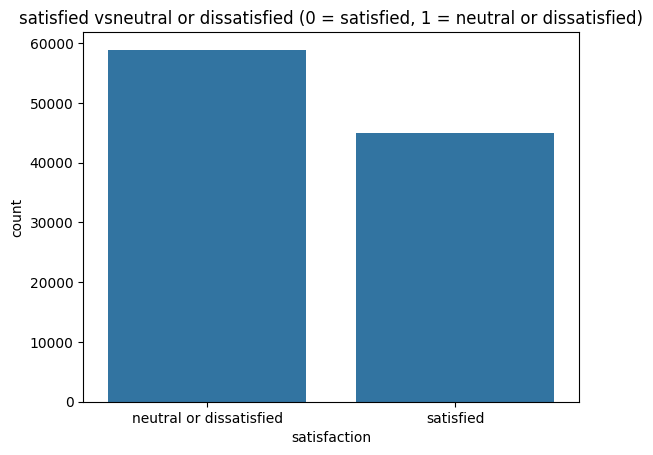

In [99]:
sns.countplot(x = 'satisfaction', data = df_train)
plt.title('satisfied vsneutral or dissatisfied (0 = satisfied, 1 = neutral or dissatisfied)')
plt.show()

In [100]:
x_train = df_train.drop('satisfaction', axis=1)
y_train = df_train['satisfaction']

In [101]:
le = LabelEncoder()

for i in x_train.columns:
  x_train[i] = le.fit_transform(x_train[i])

x_train

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,0,6,1,2,358,3,4,3,1,...,5,5,4,3,3,4,5,5,25,0
1,1,1,18,0,0,144,3,2,3,3,...,1,1,1,5,2,1,4,1,1,0
2,0,0,19,0,0,994,2,2,2,2,...,5,5,4,3,3,4,4,5,0,0
3,0,0,18,0,0,446,2,5,5,5,...,2,2,2,5,2,1,4,2,11,0
4,1,0,54,0,0,124,3,3,3,3,...,5,3,3,4,3,3,3,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,0,1,16,0,1,102,2,1,2,3,...,2,2,3,1,3,2,3,2,3,0
103900,1,0,42,0,0,2143,4,4,4,4,...,5,5,5,5,4,5,5,4,0,0
103901,1,1,23,0,0,1791,1,1,1,3,...,5,4,3,2,3,5,5,4,7,0
103902,0,1,15,0,1,860,1,1,1,5,...,1,1,4,5,0,5,4,1,0,0


In [102]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)


In [103]:
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [104]:
x_test =df_test.drop('satisfaction', axis=1)
y_test = df_test['satisfaction']


In [105]:
le = LabelEncoder()

for i in  x_test.columns:
  x_test[i] = le.fit_transform(x_test[i])

x_test

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,0,45,0,1,70,5,4,3,3,...,2,5,5,5,4,1,5,5,50,44
1,0,0,29,0,0,2300,1,1,3,0,...,4,4,4,4,3,2,4,5,0,0
2,1,1,13,0,1,95,2,0,2,3,...,1,2,4,1,2,1,2,2,0,0
3,1,0,37,0,0,2740,0,0,0,1,...,3,1,1,1,0,2,1,4,0,6
4,0,0,42,0,1,926,2,3,4,2,...,1,2,2,2,1,3,2,4,0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,1,1,27,0,0,389,3,3,3,0,...,3,4,3,2,3,3,5,4,0,0
25972,1,0,16,0,0,495,4,4,4,3,...,3,4,4,5,4,4,5,4,0,0
25973,0,0,10,1,1,641,2,5,1,4,...,1,2,4,3,3,4,4,2,0,0
25974,1,0,7,0,0,886,3,3,3,2,...,3,4,3,2,4,3,5,4,0,0


In [106]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_test = le.fit_transform(y_test)



In [107]:
model = GaussianNB()
model.fit(x_test, y_test)

GaussianNB()

In [108]:
y_pred_train = model.predict(x_train)

In [109]:
y_pred = model.predict(x_test)

In [110]:
accuracy_of_train = accuracy_score(y_train,y_pred_train)
accuracy_of_test = accuracy_score(y_test, y_pred)

print(f'Accuracy of train: {accuracy_of_train}')
print(f'Accuracy of test: {accuracy_of_test}')

Accuracy of train: 0.8546157991992609
Accuracy of test: 0.8591777024946105
